<a href="https://colab.research.google.com/github/ivan-mihailov/LS-Unit-2-Sprint-1-Assignments/blob/main/Copy_of_Ivan_Mihailov_LS_DS_214_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Logistic Regression

Do you like burritos? 🌯 You're in luck then, because in this project you'll create a model to predict whether a burrito is `'Great'`.

The dataset for this assignment comes from [Scott Cole](https://srcole.github.io/100burritos/), a San Diego-based data scientist and burrito enthusiast. 

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function .
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build `model_logr` using a pipeline that includes three transfomers and `LogisticRegression` predictor. Train model on `X_train` and `X_test`.
- **Task 7:** Calculate the training and test accuracy score for your model.
- **Task 8:** Create a horizontal bar chart showing the 10 most influencial features for your  model. 
- **Task 9:** Demonstrate and explain the differences between `model_lr.predict()` and `model_lr.predict_proba()`.

**Note** 

You should limit yourself to the following libraries:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [73]:
def wrangle(filepath):
    # Import w/ DateTimeIndex
    df = pd.read_csv(filepath, parse_dates=['Date'],
                     index_col='Date')
    
    # Drop unrated burritos
    df.dropna(subset=['overall'], inplace=True)
    
    # Derive binary classification target:
    # We define a 'Great' burrito as having an
    # overall rating of 4 or higher, on a 5 point scale
    df['Great'] = (df['overall'] >= 4).astype(int)
    
    # Drop high cardinality categoricals
    df = df.drop(columns=['Notes', 'Location', 'Address', 'URL', 'Neighborhood'])
    
    # Drop columns to prevent "leakage"
    df = df.drop(columns=['Rec', 'overall'])

    # Drop columns with too many NaNs
    df = df.drop(columns=['Yelp', 'Google',	'Chips', 'Mass (g)',	'Density (g/mL)',	
                          'Unreliable',	'NonSD',	'Chicken',	'Shrimp', 'Fish',
                          'Rice',	'Beans',	'Lettuce',	'Tomato', 'Bell peper',	
                          'Carrots', 'Cabbage',	'Sauce',	'Salsa.1','Cilantro',	
                          'Onion',	'Taquito',	'Pineapple',	'Ham', 'Chile relleno',
                          'Nopales',	'Lobster',	'Queso',	'Egg', 'Mushroom',
                          'Bacon',	'Sushi',	'Avocado',	'Corn',	'Zucchini', 'Reviewer'])
    
    # Replace 'x' and 'X' in ingredient columns with '1'

    df['Beef'] = df['Beef'].replace(['x', 'X'], 1)
    df['Pico'] = df['Pico'].replace(['x', 'X'], 1)
    df['Guac'] = df['Guac'].replace(['x', 'X'], 1)
    df['Cheese'] = df['Cheese'].replace(['x', 'X'], 1)
    df['Fries'] = df['Fries'].replace(['x', 'X'], 1)
    df['Sour cream'] = df['Sour cream'].replace(['x', 'X'], 1)
    df['Pork'] = df['Pork'].replace(['x', 'X'], 1)

    # Replace NaNs in ingredient columns with '0'

    df['Beef'] = df['Beef'].fillna(0) 
    df['Pico'] = df['Pico'].fillna(0)
    df['Guac'] = df['Guac'].fillna(0)
    df['Cheese'] = df['Cheese'].fillna(0)
    df['Fries'] = df['Fries'].fillna(0)
    df['Sour cream'] = df['Sour cream'].fillna(0)
    df['Pork'] = df['Pork'].fillna(0)

    # Convert ingredient columns to integer

    df['Beef'] = df['Beef'].astype(int)
    df['Pico'] = df['Pico'].astype(int)
    df['Guac'] = df['Guac'].astype(int)
    df['Cheese'] = df['Cheese'].astype(int)
    df['Fries'] = df['Fries'].astype(int)
    df['Sour cream'] = df['Sour cream'].astype(int)
    df['Pork'] = df['Pork'].astype(int)
    
    # Create a Nested Function to Clean the 'Burrito' Column for OneHotEncoding

    def burrito_clean(x):
      
      # Locate 'California' or 'california' in row and replace entire value with 'california'
      if (x.find('California') >= 0) | (x.find('california') >= 0):
        y_final = x.replace(x, 'california')
        return y_final
      # Locate 'Asada' or 'asada' in row and replace entire value with 'asada'
      elif (x.find('asada') >= 0) | (x.find('Asada') >= 0):
        y_final = x.replace(x, 'asada')
        return y_final
      # Locate 'Carne' or 'carne' in row and replace entire value with 'asada'
      elif (x.find('Carne') >= 0) | (x.find('carne') >= 0):
        y_final = x.replace(x, 'asada')
        return y_final
      # Locate 'Surf' or 'surf' in row and replace entire value with 'surf'
      elif (x.find('Surf') >= 0) | (x.find('surf') >= 0):
        y_final = x.replace(x, 'surf')
        return y_final
      # Locate 'Turf' or 'turf' in row and replace entire value with 'surf'
      elif (x.find('Turf') >= 0) | (x.find('turf') >= 0):
        y_final = x.replace(x, 'surf')
        return y_final
      # Locate 'Carnitas' or 'carnitas' in row and replace entire value with 'carnitas'
      elif (x.find('Carnitas') >= 0) | (x.find('carnitas') >= 0):
        y_final = x.replace(x, 'carnitas')
        return y_final
      # Replace all other values with 'others'
      else:
        y_final = x.replace(x, 'others')
        return y_final

    # Apply burrito_clean nested function to 'Burrito' column

    df['Burrito'] = df['Burrito'].apply(burrito_clean)

    # OneHotEncode 'Burrito' column using Column Transformer

    transformer = ColumnTransformer([('encoder', 
                                        ce.OneHotEncoder(use_cat_names = True), 
                                        [0])], 
                                      remainder='passthrough') 
  
    df1 = transformer.fit_transform(df)
    # Change df1 from a Numpy Array back to a Pandas Dataframe
    df = pd.DataFrame(data=df1, index=df.index, columns=['Burrito_california',
                                                         'Burrito_asada',
                                                         'Burrito_surf',
                                                         'Burrito_carnitas',
                                                         'Burrito_others', 'Cost',
                                                         'Hunger',	'Length',	
                                                         'Circum',	'Volume',	
                                                         'Tortilla',	'Temp',	
                                                         'Meat',	'Fillings',	
                                                         'Meat:filling',	'Uniformity', 
                                                         'Salsa',	'Synergy',	
                                                         'Wrap',	'Beef',	'Pico',
                                                         'Guac',	'Cheese',	'Fries',
                                                         'Sour cream',	'Pork',	'Great'])
    
    # Drop 'Burrito_others' column generated by OneHotEncoder

    df = df.drop(columns='Burrito_others')

    return df

filepath = DATA_PATH + 'burritos/burritos.csv'

**Task 1:** Use the above `wrangle` function to import the `burritos.csv` file into a DataFrame named `df`.

In [51]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.compose import ColumnTransformer

In [74]:
filepath = DATA_PATH + 'burritos/burritos.csv'
df = wrangle(filepath)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [76]:
df.head()

,Burrito_california,Burrito_asada,Burrito_surf,Burrito_carnitas,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Great
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-18,1.0,0.0,0.0,0.0,6.49,3.0,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2016-01-24,1.0,0.0,0.0,0.0,5.45,3.5,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2016-01-24,0.0,1.0,0.0,0.0,4.85,1.5,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2016-01-24,0.0,0.0,1.0,0.0,5.25,2.0,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,1.0,0.0,0.0,0.0,6.59,4.0,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


During your exploratory data analysis, note that there are several columns whose data type is `object` but that seem to be a binary encoding. For example, `df['Beef'].head()` returns:

```
0      x
1      x
2    NaN
3      x
4      x
Name: Beef, dtype: object
```

**Task 2:** Change the `wrangle` function so that these columns are properly encoded as `0` and `1`s. Be sure your code handles upper- and lowercase `X`s, and `NaN`s.

In [ ]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

In [19]:
def burrito_clean(x):
  
  if (x.find('california') >= 0) | (x.find('California') >= 0):
    y_final = x.replace(x, 'california')
  
    return y_final
  
  elif (x.find('asada') >= 0) | (x.find('Asada') >= 0):
    y_final = x.replace(x, 'asada')
  
    return y_final
  
  elif (x.find('carne') >= 0) | (x.find('Carne') >= 0):
    y_final = x.replace(x, 'asada')
  
    return y_final

  elif (x.find('surf') >= 0) | (x.find('Surf') >= 0):
    y_final = x.replace(x, 'surf')
  
    return y_final

  elif (x.find('turf') >= 0) | (x.find('Turf') >= 0):
    y_final = x.replace(x, 'surf')
  
    return y_final

  elif (x.find('carnitas') >= 0) | (x.find('Carnitas') >= 0):
    y_final = x.replace(x, 'carnitas')
  
    return y_final

  else:
    y_final = x.replace(x, 'others')

    return y_final

In [7]:
with pd.option_context('display.max_rows', 500): # Displays all of the values using value_counts
    print (df['Burrito'].value_counts())

California                        101
Carne asada                        29
California                         26
Carnitas                           23
Surf & Turf                        14
Local                              14
California Everything              13
Al pastor                           9
Adobada                             9
Surfin California                   8
Custom                              5
Holy Moly                           5
Carne asada everything              4
California - Pork Adobada           3
Chile Relleno                       3
Pastor                              3
Carne Asada                         3
Fish                                3
Breakfast                           3
2 in 1                              3
Pollo asado                         3
Al Pastor                           3
California everything               3
Shrimp                              3
Campeon                             2
carne asada                         2
California -

In [20]:
df['Burrito'] = df['Burrito'].apply(burrito_clean)

In [21]:
df['Burrito'].value_counts()

california    180
others        155
asada          44
carnitas       25
surf           17
Name: Burrito, dtype: int64

If you explore the `'Burrito'` column of `df`, you'll notice that it's a high-cardinality categorical feature. You'll also notice that there's a lot of overlap between the categories. 

**Stretch Goal:** Change the `wrangle` function above so that it engineers four new features: `'california'`, `'asada'`, `'surf'`, and `'carnitas'`. Each row should have a `1` or `0` based on the text information in the `'Burrito'` column. For example, here's how the first 5 rows of the dataset would look.

| **Burrito** | **california** | **asada** | **surf** | **carnitas** |
| :---------- | :------------: | :-------: | :------: | :----------: |
| California  |       1        |     0     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |
|  Carnitas   |       0        |     0     |    0     |      1       |
| Carne asada |       0        |     1     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |

**Note:** Be sure to also drop the `'Burrito'` once you've engineered your new features.

In [ ]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

In [77]:
df.head(10)

,Burrito_california,Burrito_asada,Burrito_surf,Burrito_carnitas,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Great
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-18,1.0,0.0,0.0,0.0,6.49,3.0,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2016-01-24,1.0,0.0,0.0,0.0,5.45,3.5,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2016-01-24,0.0,1.0,0.0,0.0,4.85,1.5,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2016-01-24,0.0,0.0,1.0,0.0,5.25,2.0,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,1.0,0.0,0.0,0.0,6.59,4.0,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-28,0.0,0.0,0.0,1.0,6.99,4.0,NaN,NaN,NaN,3.0,4.0,5.0,3.5,2.5,2.5,2.5,4.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2016-01-30,1.0,0.0,0.0,0.0,7.19,1.5,NaN,NaN,NaN,2.0,3.0,3.0,2.0,2.5,2.5,NaN,2.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2016-01-30,0.0,1.0,0.0,0.0,6.99,4.0,NaN,NaN,NaN,2.5,3.0,3.0,2.5,3.0,3.5,NaN,2.5,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2016-02-01,1.0,0.0,0.0,0.0,9.25,3.5,NaN,NaN,NaN,2.0,4.5,4.5,3.5,1.5,3.0,3.5,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421 entries, 2016-01-18 to 2019-08-27
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Burrito_california  421 non-null    float64
 1   Burrito_asada       421 non-null    float64
 2   Burrito_surf        421 non-null    float64
 3   Burrito_carnitas    421 non-null    float64
 4   Cost                414 non-null    float64
 5   Hunger              418 non-null    float64
 6   Length              283 non-null    float64
 7   Circum              281 non-null    float64
 8   Volume              281 non-null    float64
 9   Tortilla            421 non-null    float64
 10  Temp                401 non-null    float64
 11  Meat                407 non-null    float64
 12  Fillings            418 non-null    float64
 13  Meat:filling        412 non-null    float64
 14  Uniformity          419 non-null    float64
 15  Salsa               396 non-null    fl

In [ ]:
df.isnull().sum()

Burrito           0
Cost              7
Hunger            3
Length          138
Circum          140
Volume          140
Tortilla          0
Temp             20
Meat             14
Fillings          3
Meat:filling      9
Uniformity        2
Salsa            25
Synergy           2
Wrap              3
Beef              0
Pico              0
Guac              0
Cheese            0
Fries             0
Sour cream        0
Pork              0
Great             0
dtype: int64

In [ ]:
df.dropna(subset = ['Reviewer'], inplace = True) # Drop 1 row where reviewer was NaN

In [ ]:
df.isna().sum()

Burrito           0
Cost              6
Hunger            3
Length          137
Circum          139
Volume          139
Tortilla          0
Temp             20
Meat             13
Fillings          3
Meat:filling      8
Uniformity        2
Salsa            24
Synergy           2
Wrap              3
Reviewer          0
Beef              0
Pico              0
Guac              0
Cheese            0
Fries             0
Sour cream        0
Pork              0
Great             0
dtype: int64

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'Great'`.

In [79]:
X = ['Burrito_california',	'Burrito_asada',	'Burrito_surf',	'Burrito_carnitas',
     'Cost',	'Hunger',	'Length',	'Circum',	'Volume',	'Tortilla',	'Temp',	'Meat',
     'Fillings',	'Meat:filling',	'Uniformity',	'Salsa',	'Synergy',	'Wrap',
     'Beef',	'Pico',	'Guac',	'Cheese',	'Fries',	'Sour cream',	'Pork']
y = 'Great'

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from 2016 through 2017. 
- Your test set should include data from 2018 and later.

In [80]:
cutoff = pd.to_datetime('2018-01-01') # Create cutoff of January 1, 2018 for train/test split
train = df[df.index < cutoff]
test = df[df.index >= cutoff]

X_train, y_train = train[X], train[y]
X_test, y_test = test[X], test[y]

In [81]:
X_train.shape, y_train.shape

((383, 25), (383,))

In [82]:
X_test.shape, y_test.shape

((38, 25), (38,))

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents. 

In [83]:
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()
y_pred_baseline = [majority_class] * len(y_train)

baseline_acc = accuracy_score(y_train, y_pred_baseline)
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5822454308093995


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_logr`, and fit it to your training data. Your pipeline should include:

- a `OneHotEncoder` transformer for categorical features, 
- a `SimpleImputer` transformer to deal with missing values, 
- a [`StandarScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transfomer (which often improves performance in a logistic regression model), and 
- a `LogisticRegression` predictor.

In [84]:
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train) # Use SimpleImputer to impute mean for any remaining NaNs
X_test_imputed = imputer.transform(X_test) # Use SimpleImputer to impute mean for any remaining NaNs

In [85]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed) # Use StandardScaler to standardize the features
X_test_scaled = scaler.transform(X_test_imputed) # Use StandardScaler to standardize the features

In [86]:
model_lr = LogisticRegressionCV()

model_lr.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

# IV. Check Metrics

**Task 7:** Calculate the training and test accuracy score for `model_lr`.

In [87]:
y_pred_train = model_lr.predict(X_train_scaled)
y_pred_test = model_lr.predict(X_test_scaled)

training_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score (y_test, y_pred_test)

print('Training Accuracy Score:', training_acc)
print('Test Accuracy Score:', test_acc)

Training Accuracy Score: 0.9033942558746736
Test Accuracy Score: 0.7631578947368421


# V. Communicate Results

**Task 8:** Create a horizontal barchart that plots the 10 most important coefficients for `model_lr`, sorted by absolute value.

**Note:** Since you created your model using a `Pipeline`, you'll need to use the [`named_steps`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) attribute to access the coefficients in your `LogisticRegression` predictor. Be sure to look at the shape of the coefficients array before you combine it with the feature names.

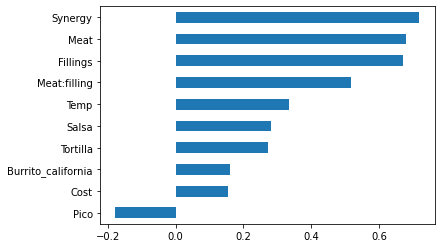

In [94]:
# Create your horizontal barchart here.

%matplotlib inline
coefficients = pd.Series(model_lr.coef_[0], X_train.columns)
coef_top_9 = coefficients.nlargest(9) # Isolate Top 9 features (by coefficient size)
coef_bot_1 = coefficients.nsmallest(1) # Isolate Bottom 1 feature (by coefficient size)
coef_top_10 = coef_top_9.append(coef_bot_1) # Append the Bottom 1 feature to the Top 9 features (by coefficient size)

coef_top_10.sort_values().plot.barh()

In [93]:
coefficients.sort_values()

Pico                 -0.178766
Burrito_carnitas     -0.122770
Beef                 -0.097844
Fries                -0.044746
Cheese               -0.002653
Wrap                 -0.001834
Circum                0.000287
Volume                0.001588
Burrito_asada         0.002023
Pork                  0.023594
Burrito_surf          0.027777
Sour cream            0.052722
Hunger                0.073716
Length                0.085728
Guac                  0.148812
Uniformity            0.152614
Cost                  0.154865
Burrito_california    0.160268
Tortilla              0.273967
Salsa                 0.281049
Temp                  0.335564
Meat:filling          0.516040
Fillings              0.670461
Meat                  0.678775
Synergy               0.718770
dtype: float64

There is more than one way to generate predictions with `model_lr`. For instance, you can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) or [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba).

**Task 9:** Generate predictions for `X_test` using both `predict` and `predict_proba`. Then below, write a summary of the differences in the output for these two methods. You should answer the following questions:

- What data type do `predict` and `predict_proba` output?
- What are the shapes of their different output?
- What numerical values are in the output?
- What do those numerical values represent?

In [95]:
# Write code here to explore the differences between `predict` and `predict_proba`.

y_pred_proba_test = model_lr.predict_proba(X_test_scaled)
print(y_pred_proba_test)

[[0.01133012 0.98866988]
 [0.05545975 0.94454025]
 [0.9791128  0.0208872 ]
 [0.00413463 0.99586537]
 [0.95482814 0.04517186]
 [0.67624474 0.32375526]
 [0.24574965 0.75425035]
 [0.03485274 0.96514726]
 [0.53660524 0.46339476]
 [0.18954336 0.81045664]
 [0.39322278 0.60677722]
 [0.85015789 0.14984211]
 [0.27573223 0.72426777]
 [0.45990815 0.54009185]
 [0.26613337 0.73386663]
 [0.20496615 0.79503385]
 [0.2515055  0.7484945 ]
 [0.90576665 0.09423335]
 [0.95454622 0.04545378]
 [0.913574   0.086426  ]
 [0.90627017 0.09372983]
 [0.13817984 0.86182016]
 [0.70044555 0.29955445]
 [0.57509599 0.42490401]
 [0.2942961  0.7057039 ]
 [0.79466153 0.20533847]
 [0.78561964 0.21438036]
 [0.00420556 0.99579444]
 [0.14459736 0.85540264]
 [0.08967363 0.91032637]
 [0.76041124 0.23958876]
 [0.36796538 0.63203462]
 [0.18539087 0.81460913]
 [0.90618963 0.09381037]
 [0.32562766 0.67437234]
 [0.41919175 0.58080825]
 [0.0226031  0.9773969 ]
 [0.19718749 0.80281251]]


In [96]:
print(y_pred_test)

[1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]


**Give your written answer here:**

Both *predict* and *predict_proba* output a numpy array for the target based on the X_test data

The shape of the *predict_proba* output is a two-element array for each element in the output. The shape of the *predict* output is an array with individual integer elements. 

The numerical values for the *predict* array are 0s and 1s. The numerical values for each element of the *predict_proba* array are floats which add to 1.

The numerical values for the *predict* array represent whether that particular predicted target value is in one category or another (it is predicted to be 1 if the burrito is 'Great'; 0 if it is not). The numerical values for each element of the *predict_proba* array represent the probability as to whether that particular predicted target value is in one category or another (the first element is the probability that the burrito is not great; the second element is the probability that the burrito is 'Great').
```


```